In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Data Set

In [30]:
data=pd.read_csv('election_results_2024.csv')

In [33]:
# Replace '-' with '0'
data['Margin'] = data['Margin'].replace('-', '0')

# Convert the column to integers
data['Margin'] = data['Margin'].astype(int)


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    int32 
 7   Status              543 non-null    object
dtypes: int32(1), int64(1), object(6)
memory usage: 31.9+ KB


Seat Won by each party Bar charts plotting

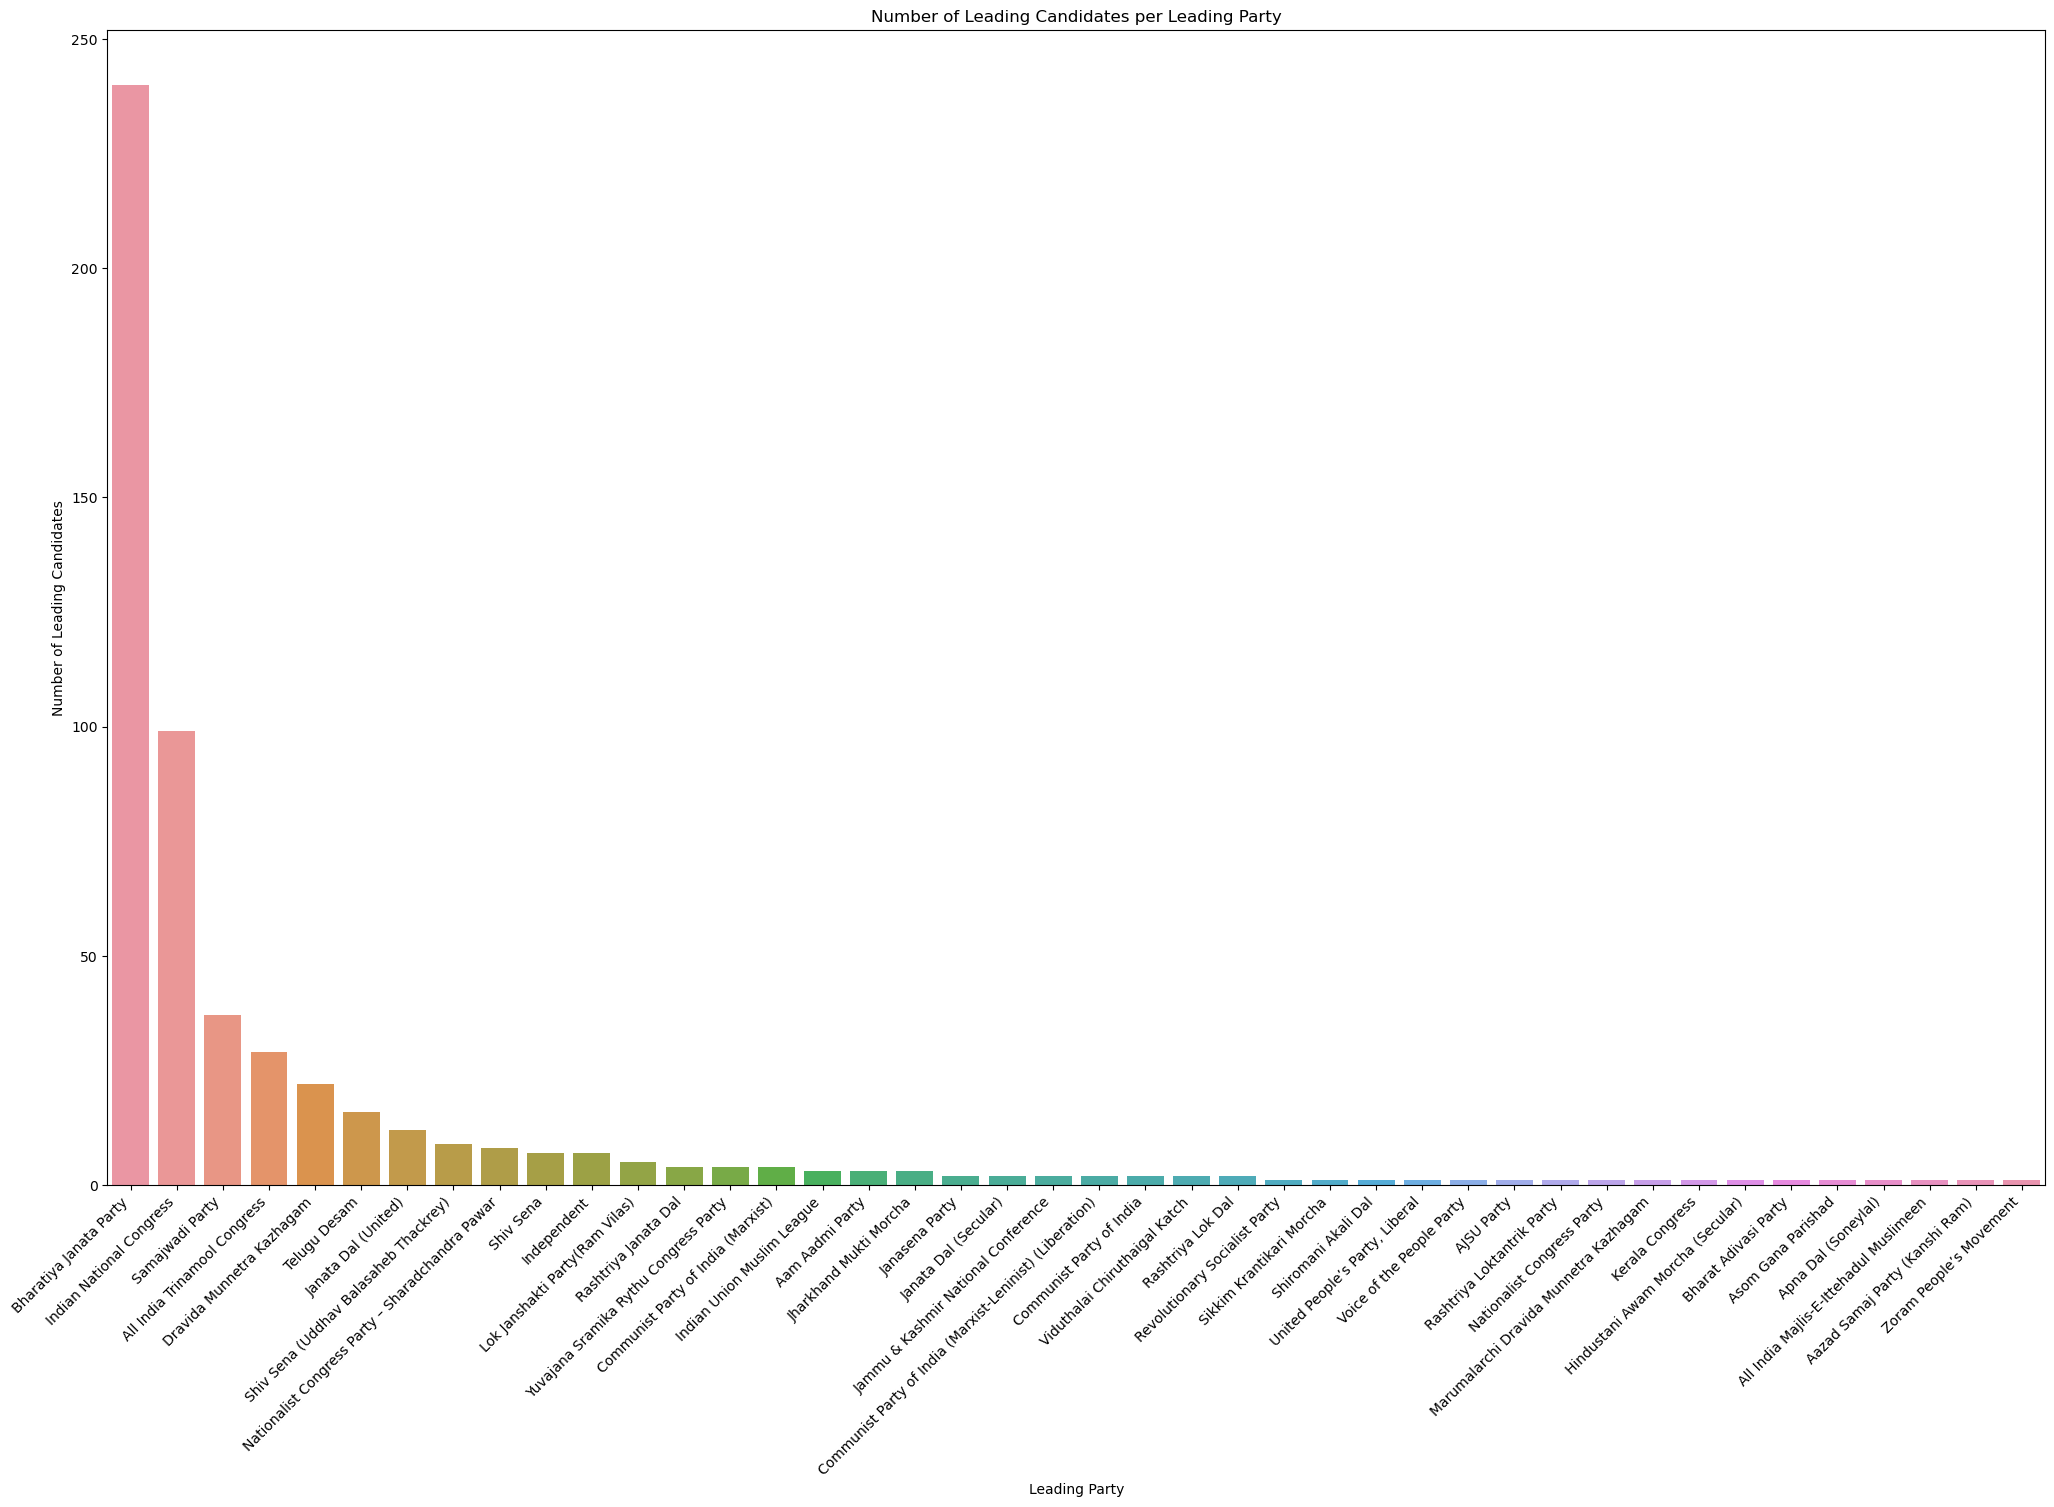

In [35]:
majority=data.groupby(['Leading Party']).agg({'Leading Candidate':'count'}).sort_values(by=['Leading Candidate'],ascending=False).reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x='Leading Party', y='Leading Candidate', data=majority)
plt.xlabel('Leading Party')
plt.ylabel('Number of Leading Candidates')
plt.title('Number of Leading Candidates per Leading Party')
plt.xticks(rotation=45, ha='right')
plt.show()

Votes Distribution By Parties

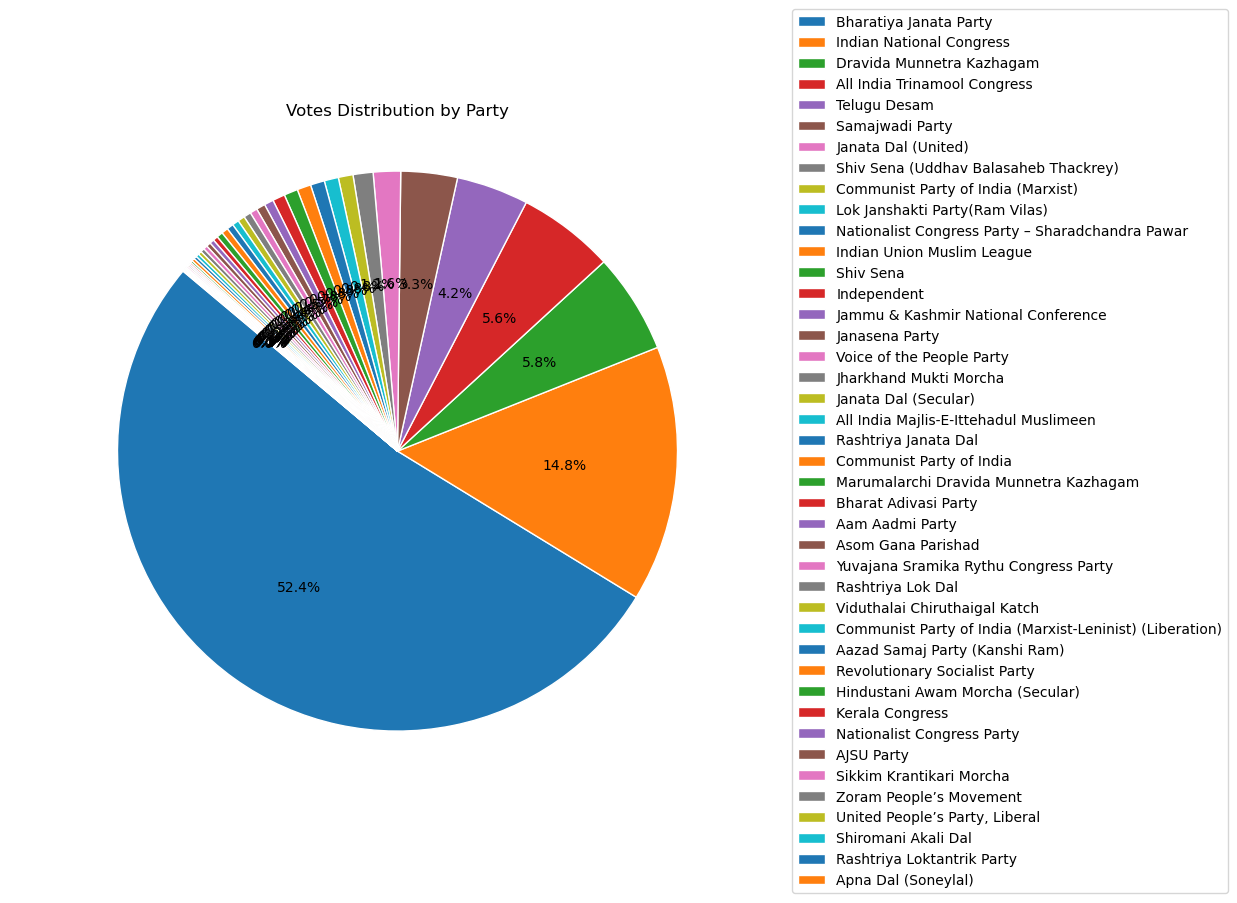

In [36]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Convert 'Margin' values to float128
# party_votes = party_votes.astype(np.int)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

plt.show()


Trailing Party By Votes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

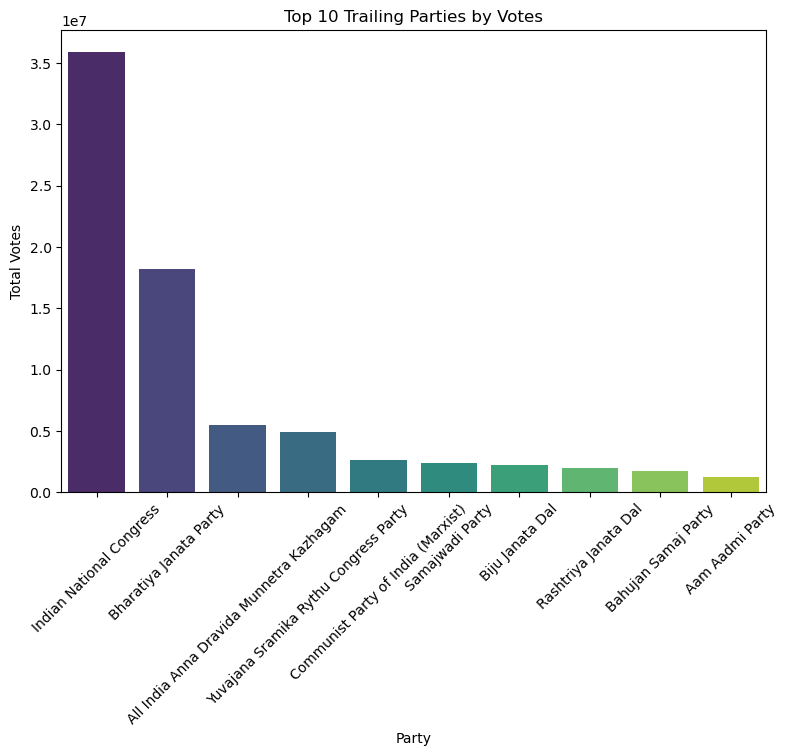

In [37]:
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

Vote Comparision

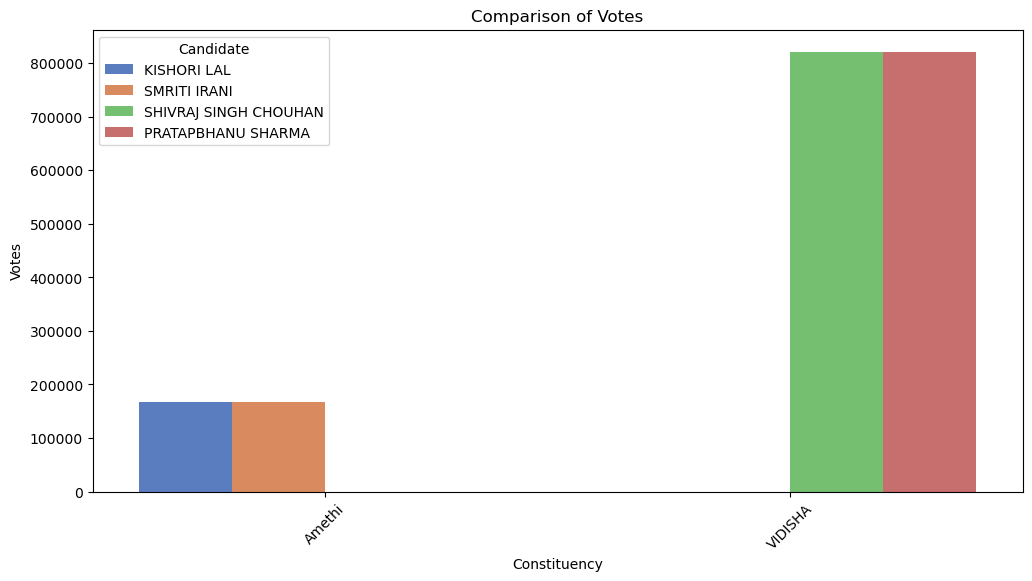

In [38]:
kishori_lal = data[data['Leading Candidate'] == 'KISHORI LAL']
smriti_irani = data[data['Trailing Candidate'] == 'SMRITI IRANI']
shivraj_singh = data[data['Leading Candidate'] == 'SHIVRAJ SINGH CHOUHAN']
pratap_bhanu = data[data['Trailing Candidate'] == 'PRATAPBHANU SHARMA']

kishori_votes = kishori_lal['Margin'].values
smriti_votes = smriti_irani['Margin'].values[0] if not smriti_irani.empty else 0
shivraj_votes = shivraj_singh['Margin'].values[0] if not shivraj_singh.empty else 0
pratap_votes = pratap_bhanu['Margin'].values[0] if not pratap_bhanu.empty else 0

kishori_constituency = list(kishori_lal['Constituency'])
smriti_constituency = list(smriti_irani['Constituency'])
shivraj_constituency = list(shivraj_singh['Constituency'])
pratap_constituency = list(pratap_bhanu['Constituency'])

data_to_plot = pd.DataFrame({
    'Candidate': ['KISHORI LAL'] * len(kishori_votes) + ['SMRITI IRANI'] * (1 if not smriti_irani.empty else 0) +
                 ['SHIVRAJ SINGH CHOUHAN'] * (1 if not shivraj_singh.empty else 0) + ['PRATAPBHANU SHARMA'] * (1 if not pratap_bhanu.empty else 0),
    'Constituency': kishori_constituency + smriti_constituency + shivraj_constituency + pratap_constituency,
    'Votes': list(kishori_votes) + [smriti_votes] + [shivraj_votes] + [pratap_votes]
})


plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of Votes')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()